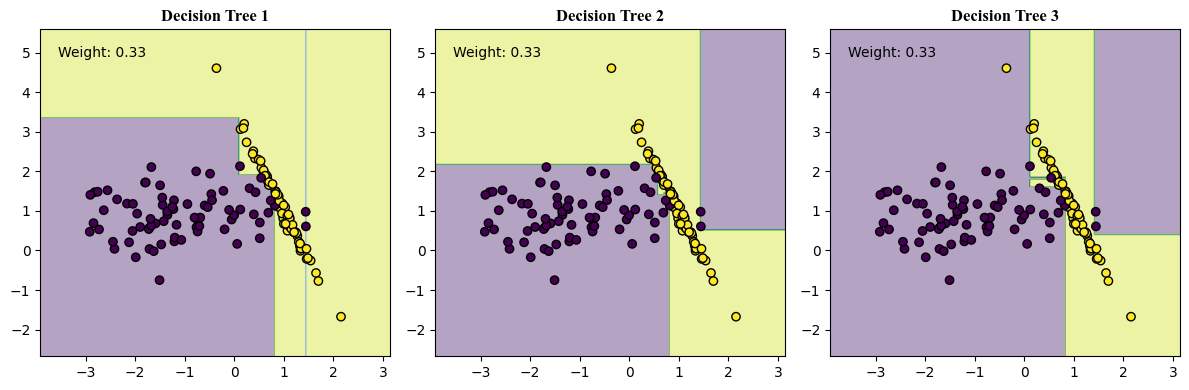

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
import dtreeviz

csfont = {'fontname':'Times New Roman'}

# Generate toy dataset
X, y = make_classification(n_samples=150, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create bagged classifier using decision trees
bagged_classifier = BaggingClassifier(DecisionTreeClassifier(), n_estimators=3)
bagged_classifier.fit(X, y)

# Get the individual decision trees from the ensemble
decision_trees = bagged_classifier.estimators_

# Calculate the weights of the classifiers in the bag
weights = np.ones(len(decision_trees)) / len(decision_trees)

# Plot decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

plt.figure(figsize=(12, 4))

for i, tree in enumerate(decision_trees):
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    plt.subplot(131 + i)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f'Decision Tree {i+1}', fontsize=12, fontweight='bold',**csfont)

    # Add weights to the plot
    plt.text(0.05, 0.95, f"Weight: {weights[i]:.2f}",
             transform=plt.gca().transAxes, va='top')

plt.tight_layout()
plt.savefig('../figures/bagged_classifier_decision_regions.pdf', format='pdf')
plt.show()


In [22]:
# Create a PDF file to save the decision trees
with PdfPages('../figures/bagged_classifier_decision_trees.pdf') as pdf:
    # Save each decision tree as a separate page in the PDF
    for i, tree in enumerate(decision_trees):
        viz = dtreeviz.model(tree,
                       X,
                       y,
                       target_name='Class',
                       feature_names=['Feature 1', 'Feature 2'],
                       class_names=['Class 1', 'Class -1'])
        v = viz.view()
        v.save(f'../figures/decision_tree_{i+1}.svg')
        plt.close()

print("Decision trees saved in 'bagged_classifier_decision_trees.pdf'")

Decision trees saved in 'bagged_classifier_decision_trees.pdf'
